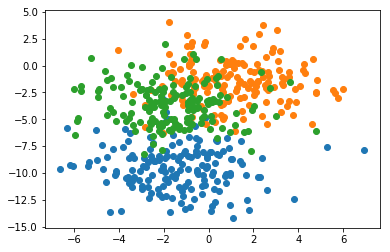

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

for class_value in range(3):
	row_ix = where(y == class_value)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

C:\Users\PSMike\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
W0615 10:07:15.094528 23616 deprecation_wrapper.py:119] From C:\Users\PSMike\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train: 0.867, Test: 0.794


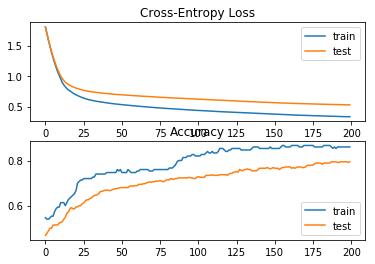

In [3]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)

n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(15, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

> 0.757
> 0.763
> 0.783
> 0.723
> 0.809
> 0.734
> 0.791
> 0.746
> 0.751
> 0.757
> 0.743
> 0.743
> 0.780
> 0.789
> 0.771
> 0.754
> 0.780
> 0.774
> 0.746
> 0.786
> 0.794
> 0.737
> 0.786
> 0.780
> 0.811
> 0.757
> 0.771
> 0.774
> 0.757
> 0.769
Scores Mean: 0.767, Standard Deviation: 0.022


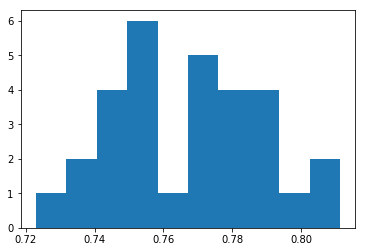

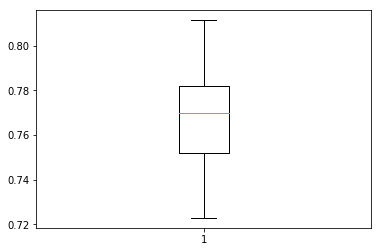

In [4]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot


def evaluate_model(trainX, trainy, testX, testy):
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit(trainX, trainy, epochs=200, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return test_acc


X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
n_repeats = 30
scores = list()
for _ in range(n_repeats):
	score = evaluate_model(trainX, trainy, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))
pyplot.hist(scores, bins=10)
pyplot.show()
pyplot.boxplot(scores)
pyplot.show()

1
> 0.783
2
> 0.766
3
> 0.774
4
> 0.777
5
> 0.780
6
> 0.771
7
> 0.771
8
> 0.771
9
> 0.771
10
> 0.771
11
> 0.771
12
> 0.769
13
> 0.771
14
> 0.771
15
> 0.771
16
> 0.769
17
> 0.769
18
> 0.769
19
> 0.771
20
> 0.771


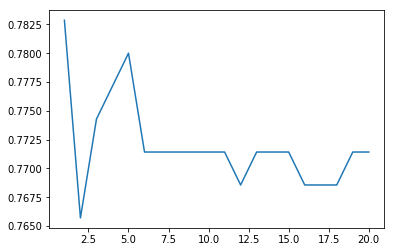

In [2]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from numpy import array
from numpy import argmax
import numpy


def fit_model(trainX, trainy):
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit(trainX, trainy, epochs=200, verbose=0)
	return model


def ensemble_predictions(members, testX):
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	summed = numpy.sum(yhats, axis=0)
	result = argmax(summed, axis=1)
	return result


def evaluate_n_members(members, n_members, testX, testy):
	subset = members[:n_members]
	print(len(subset))
	yhat = ensemble_predictions(subset, testX)
	return accuracy_score(testy, yhat)


X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
n_members = 20
members = [fit_model(trainX, trainy) for _ in range(n_members)]
scores = list()
for i in range(1, n_members+1):
	score = evaluate_n_members(members, i, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
x_axis = [i for i in range(1, n_members+1)]
pyplot.plot(x_axis, scores)
pyplot.show()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
import numpy


def fit_model(trainX, trainy):
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit(trainX, trainy, epochs=200, verbose=0)
	return model


def ensemble_predictions(members, testX):
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	summed = numpy.sum(yhats, axis=0)
	result = argmax(summed, axis=1)
	return result


def evaluate_members(members, testX, testy):
	yhat = ensemble_predictions(members, testX)
	return accuracy_score(testy, yhat)


X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
n_repeats = 30
n_members = 5
scores = list()
for _ in range(n_repeats):
	members = [fit_model(trainX, trainy) for _ in range(n_members)]
	score = evaluate_members(members, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

> 0.774
> 0.763
> 0.760
> 0.769
> 0.780
> 0.769
> 0.771
> 0.763
> 0.760
> 0.777
> 0.769
> 0.766
> 0.769
> 0.771
> 0.769
> 0.760
> 0.763
> 0.771
> 0.757
> 0.766
> 0.786
> 0.763
> 0.771
> 0.771
> 0.760
> 0.769
> 0.777
> 0.771
> 0.763
> 0.754
Scores Mean: 0.768, Standard Deviation: 0.007
